<a href="https://colab.research.google.com/github/esapratama/ALGORITMA-DAN-STRUKTUR-DATA/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

# Praktikum Filter

In [4]:
def convolution2d(image, kernel, stride, padding):
  pass

In [6]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Tambahkan padding
    image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    kernel_height, kernel_width = kernel.shape
    output_height = (image_padded.shape[0] - kernel_height) // stride + 1
    output_width = (image_padded.shape[1] - kernel_width) // stride + 1

    output = np.zeros((output_height, output_width))

    for y in range(0, output_height):
        for x in range(0, output_width):
            region = image_padded[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            output[y, x] = np.sum(region * kernel)

    return output

In [7]:
img = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

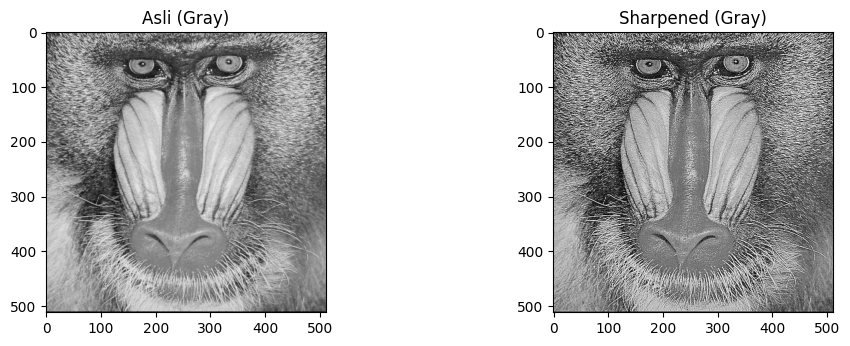

In [26]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

img = cv.imread("/content/drive/MyDrive/PCVK/mandrill.tiff")

# Terapkan sharpening
sharpened = cv.filter2D(img, -1, kernel_sharpen)

# Ubah ke grayscale
gray_original = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_sharpened = cv.cvtColor(sharpened, cv.COLOR_BGR2GRAY)

# Plot hasil
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray_original, cmap="gray")
plt.title("Asli (Gray)")

plt.subplot(2,2,2)
plt.imshow(gray_sharpened, cmap="gray")
plt.title("Sharpened (Gray)")
plt.show()


In [25]:
convolution2d(img_gray, kernel_sharpen,1,2)

array([[   0., -145.,  -56., ..., -153., -177.,    0.],
       [-145.,  553.,  -15., ...,  326.,  607., -177.],
       [-116.,  257.,  179., ...,  249.,  218., -125.],
       ...,
       [-156.,  487.,  262., ...,  159.,  183.,  -69.],
       [ -11., -112., -110., ...,  -71.,  -53.,   -4.],
       [   0.,  -11.,  -11., ...,   -4.,   -4.,    0.]])

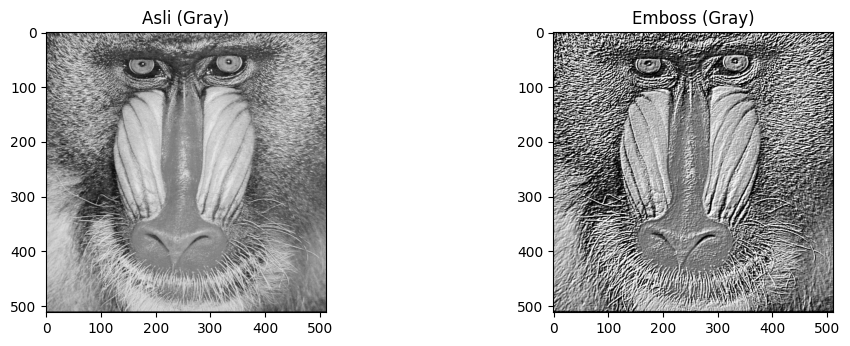

In [32]:
kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

img = cv.imread("/content/drive/MyDrive/PCVK/mandrill.tiff")

emboss = cv.filter2D(img, -1, kernel_emboss)

# Ubah ke grayscale
gray_original = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_emboss = cv.cvtColor(emboss, cv.COLOR_BGR2GRAY)

# Plot hasil
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray_original, cmap="gray")
plt.title("Asli (Gray)")

plt.subplot(2,2,2)
plt.imshow(gray_emboss, cmap="gray")
plt.title("Emboss (Gray)")
plt.show()


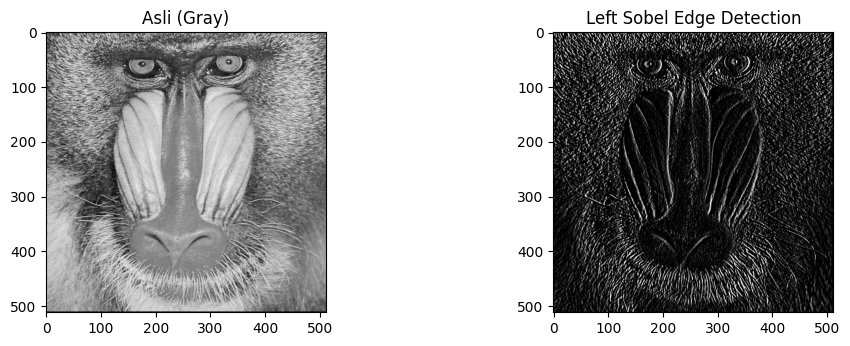

In [37]:
kernel_left_sobel = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])

img = cv.imread("/content/drive/MyDrive/PCVK/mandrill.tiff")

left_sobel = cv.filter2D(img, -1, kernel_left_sobel)

gray_original = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_left_sobel = cv.cvtColor(left_sobel, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray_original, cmap="gray")
plt.title("Asli (Gray)")

plt.subplot(2,2,2)
plt.imshow(gray_left_sobel, cmap="gray")
plt.title("Left Sobel Edge Detection")
plt.show()


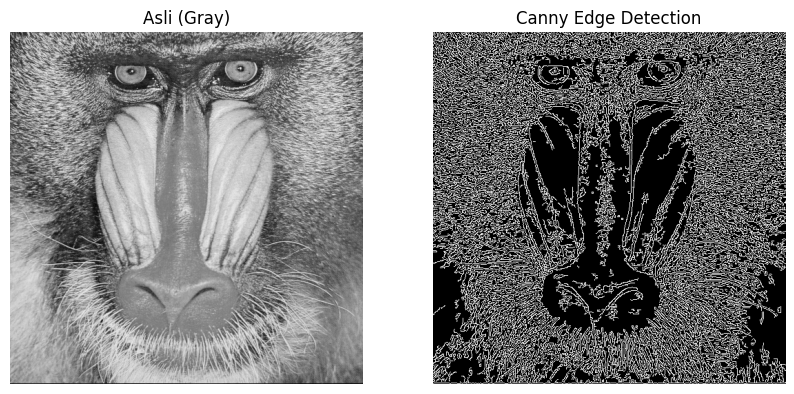

In [63]:
kernel_canny = np.array([
    [-1, -1, -1],
     [-1, 8, -1],
      [-1, -1, -1] ])

img = cv.imread("/content/drive/MyDrive/PCVK/mandrill.tiff")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


edges = cv.Canny(img_gray, 50, 150)

# Tampilkan
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Asli (Gray)")
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.show()


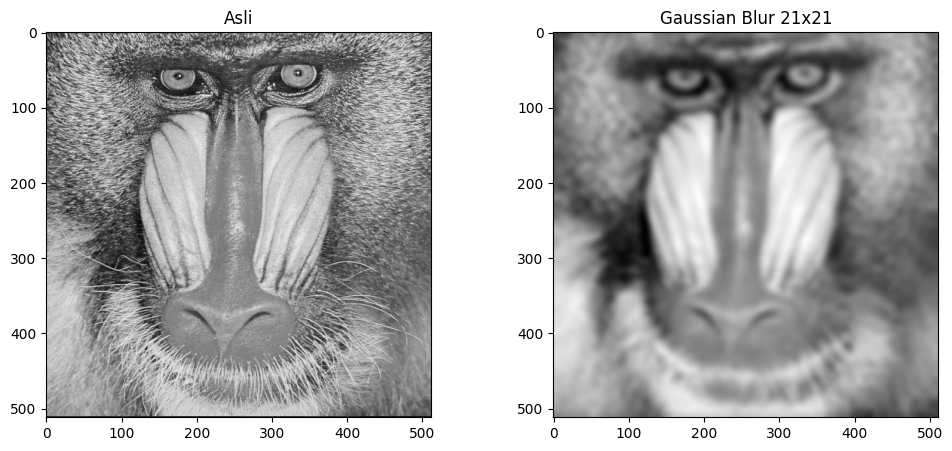

In [64]:
# gaussian blur

kernel_size = 21
sigma = math.sqrt(kernel_size)

# 1D Gaussian kernel
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)

# 2D Gaussian kernel
gauss_kernel = gaussian_kernel @ gaussian_kernel.T

# pastikan normalisasi (jumlah = 1)
gauss_kernel = gauss_kernel / gauss_kernel.sum()

# gambar mandrill
blurred = cv.filter2D(img_gray, -1, gauss_kernel)

# tampilkan hasil
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Asli")
plt.imshow(img_gray, cmap="gray")
plt.axis("on")

plt.subplot(1,2,2)
plt.title("Gaussian Blur 21x21")
plt.imshow(blurred, cmap="gray")
plt.axis("on")

plt.show()

# week 7

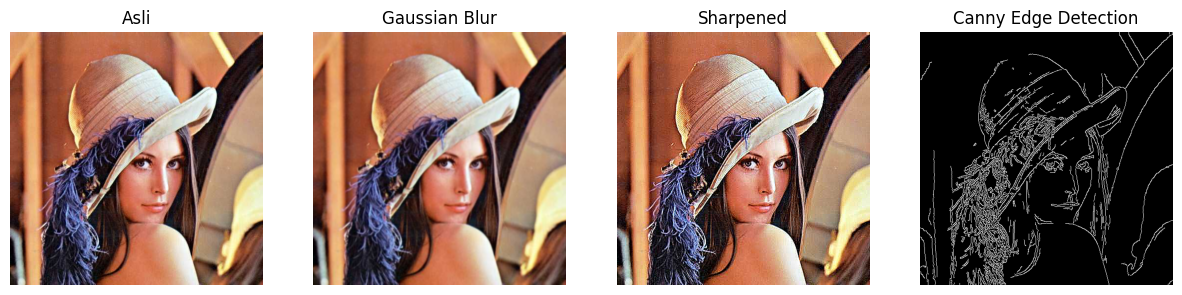

In [68]:
# Percobaan 1
# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap="gray")
        else:  # color
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/PCVK/Images/lena.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 100, 200)

sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)

show_side_by_side([img, blur, sharpened, edges],
                  ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])

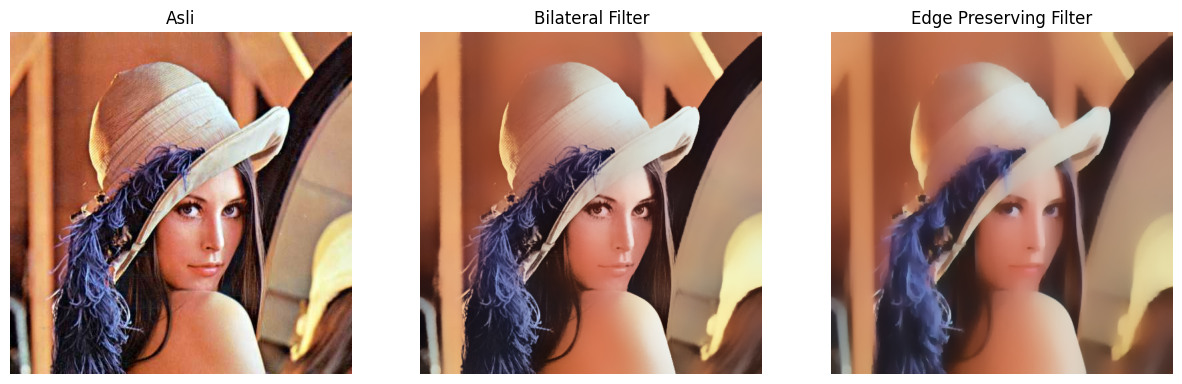

In [69]:
#percobaan 2

# Filter Modern dari OpenCV

# Bilateral Filter (edge-preserving)
bilateral = cv.bilateralFilter(img, 50, 100, 100)

# Edge Preserving Filter (alternatif Guided Filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side([img, bilateral, edge_preserve],
                  ["Asli", "Bilateral Filter", "Edge Preserving Filter"])


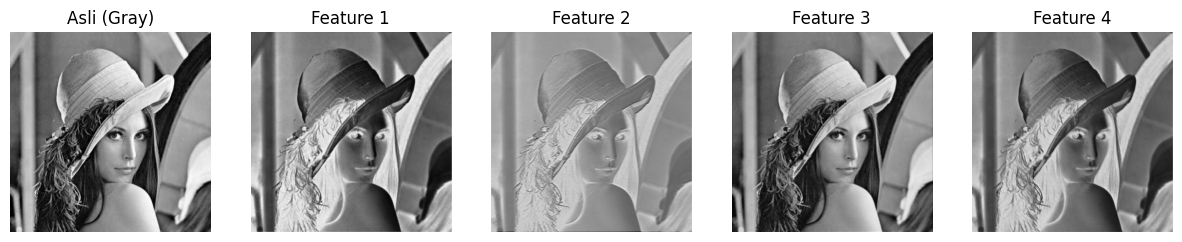

In [70]:
#Percobaan 3
# Filter Feature Map yang digunakan pada CNN,
# Lakukan running code bagian ini beberapa kali dan perhatikan hasilnya

import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0, i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps,
                  ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])


Text(0.5, 1.0, 'Old/Vintage Filter')

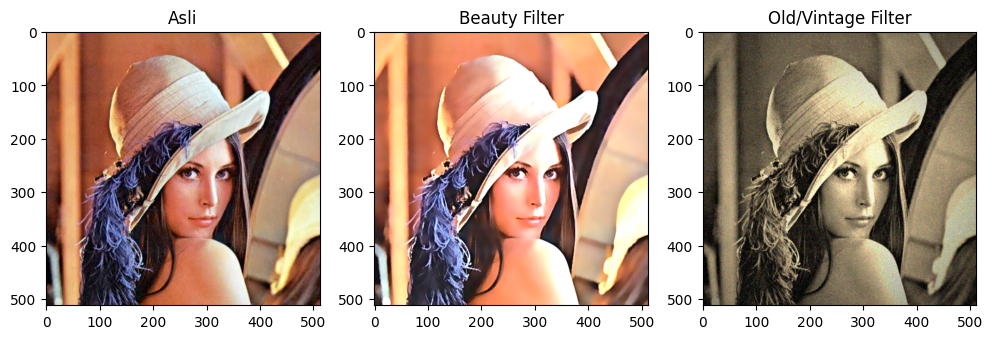

In [72]:
#Percobaan 4

# ======================
# 1. Beauty Filter
# ======================

# Step 1 : Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2 : Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0, 0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3 : Brightness & contrast
alpha = 1.2   # contrast
beta = 15     # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)


# ======================
# 2. Old/Vintage Filter
# ======================

# Step 1 : Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2 : Vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask

# Step 3 : Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Asli")

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(beauty, cv.COLOR_BGR2RGB))
plt.title("Beauty Filter")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(old_img, cv.COLOR_BGR2RGB))
plt.title("Old/Vintage Filter")



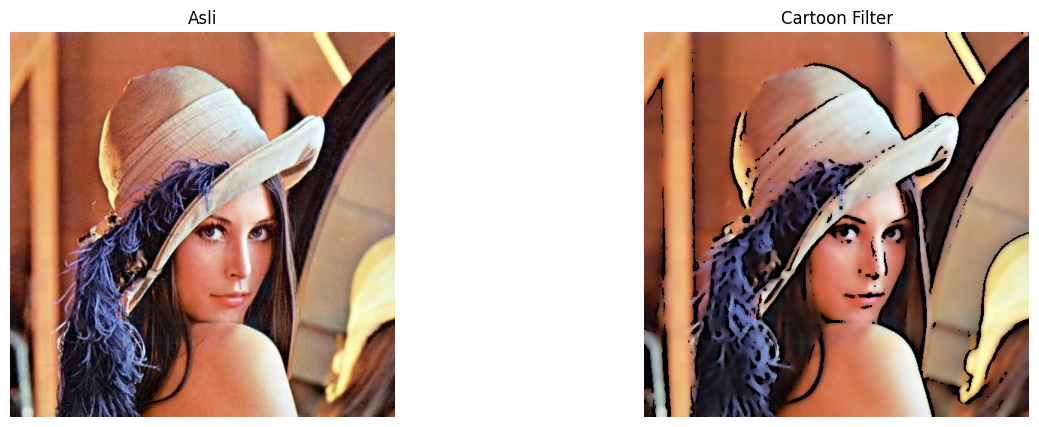

In [74]:
#Percobaan 5
# Filter Anime / Cartoon

# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
                             cv.ADAPTIVE_THRESH_MEAN_C,
                             cv.THRESH_BINARY, 9, 9)

# Step 2: Bilateral Filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)

# Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

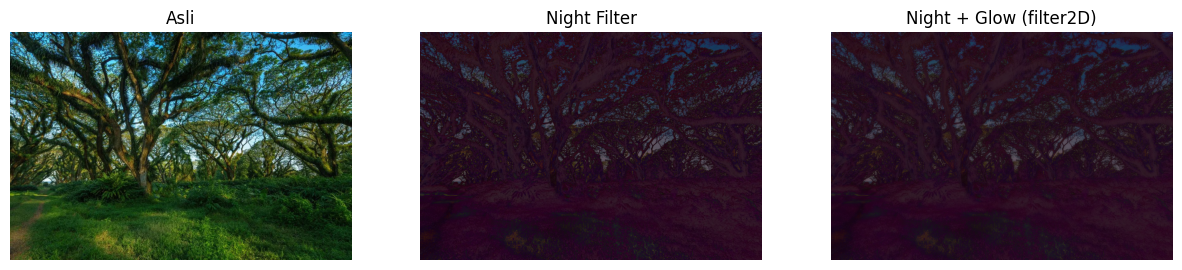

In [75]:
#Percobaan 6
# Night Filter
img = cv.imread("/content/drive/MyDrive/PCVK/djawatan.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100))  # BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15, 15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

# Tampilkan
show_side_by_side([img, night, night_glow],
                  ["Asli", "Night Filter", "Night + Glow (filter2D)"])

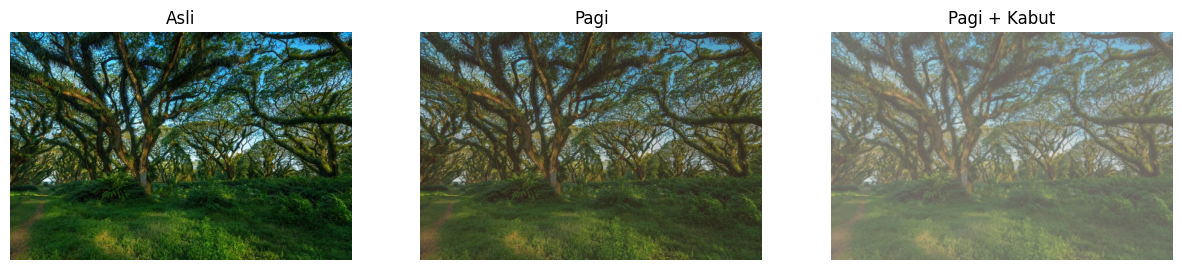

In [76]:
# Percobaan 7

# Filter Suasana Pagi dan Kabut
# ==============================
# Step 1: Kurangi kontras & cerahkan
# ==============================
alpha = 0.9 # contrast
beta = 20 # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# ==============================
# Step 2: Tambahkan warm tone (kemerahan / oranye)
# ==============================
warm_tint = np.full_like(soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# ==============================
# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# ==============================
# Kernel blur Gaussian-like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# tambah layer putih untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

show_side_by_side([img, pagi, kabut],
                  ["Asli", "Pagi", "Pagi + Kabut"])